In [1]:
from fbprophet import Prophet 
import pandas as pd
import numpy as np
import holidays 
from datetime import date 


In [6]:
goodholidays =[]
for date, name in sorted(holidays.US(years=2014).items()):
    print(date,name)
    goodholidays.append(name)

2014-01-01 New Year's Day
2014-01-20 Martin Luther King, Jr. Day
2014-02-17 Washington's Birthday
2014-05-26 Memorial Day
2014-07-04 Independence Day
2014-09-01 Labor Day
2014-10-13 Columbus Day
2014-11-11 Veterans Day
2014-11-27 Thanksgiving
2014-12-25 Christmas Day


In [8]:
goodholidays.remove("New Year's Day")
goodholidays.remove("Martin Luther King, Jr. Day")
goodholidays.remove("Columbus Day")
goodholidays.remove("Veterans Day")
goodholidays.remove("Christmas Day")

In [9]:
sales = pd.DataFrame(columns = ['holiday','ds','lower_window', 'upper_window'])
sales.head()
#to add new holidays: make a list and get that row --> make it an excel file and import it in 
#modelingdataset.loc[date] = np.nan
#holiday, day it occurs, 
#if holiday is on a Mon/Tues the prior weekend is included, if it is a Thursd/Friday holiday the next weekend is included 

,holiday,ds,lower_window,upper_window


In [14]:
for year in range (2014,2021):
    for date, name in sorted (holidays.US(years=year).items()):
        lower_window = 0 #reset these to variables depending on the holiday, depending on the year 
        upper_window = 0 
        if name in goodholidays: 
            dayoftheweek = date.weekday()
           # print (dayoftheweek, date, name) #this vizualizes the day of the week, date and name of the holiday 
            if dayoftheweek ==0:
                lower_window = -2 #weekend is starting 2 days before 
            if dayoftheweek ==1:
                lower_window = -3 #weekend is satarting 3 days before (assuming people take monday off)
            if dayoftheweek == 3: 
                upper_window =3
            if dayoftheweek ==4: 
                upper_window =2 
            sales.loc[len(sales)] = [name, date, lower_window, upper_window] #appending all holidays to the last row of a data from 
            
            #monday is 0, sunday is 6 


                 holiday          ds lower_window upper_window
0  Washington's Birthday  2014-02-17           -2            0
1           Memorial Day  2014-05-26           -2            0
2       Independence Day  2014-07-04            0            2
3              Labor Day  2014-09-01           -2            0
4           Thanksgiving  2014-11-27            0            3
                 holiday          ds lower_window upper_window
0  Washington's Birthday  2014-02-17           -2            0
1           Memorial Day  2014-05-26           -2            0
2       Independence Day  2014-07-04            0            2
3              Labor Day  2014-09-01           -2            0
4           Thanksgiving  2014-11-27            0            3
                 holiday          ds lower_window upper_window
0  Washington's Birthday  2014-02-17           -2            0
1           Memorial Day  2014-05-26           -2            0
2       Independence Day  2014-07-04            0      

                 holiday          ds lower_window upper_window
0  Washington's Birthday  2014-02-17           -2            0
1           Memorial Day  2014-05-26           -2            0
2       Independence Day  2014-07-04            0            2
3              Labor Day  2014-09-01           -2            0
4           Thanksgiving  2014-11-27            0            3
                 holiday          ds lower_window upper_window
0  Washington's Birthday  2014-02-17           -2            0
1           Memorial Day  2014-05-26           -2            0
2       Independence Day  2014-07-04            0            2
3              Labor Day  2014-09-01           -2            0
4           Thanksgiving  2014-11-27            0            3
                 holiday          ds lower_window upper_window
0  Washington's Birthday  2014-02-17           -2            0
1           Memorial Day  2014-05-26           -2            0
2       Independence Day  2014-07-04            0      

In [15]:
sales.head()

,holiday,ds,lower_window,upper_window
0,Washington's Birthday,2014-02-17,-2,0
1,Memorial Day,2014-05-26,-2,0
2,Independence Day,2014-07-04,0,2
3,Labor Day,2014-09-01,-2,0
4,Thanksgiving,2014-11-27,0,3


In [17]:
netflix = pd.read_csv('netflix.googletrends.csv', parse_dates = ['period'])

In [18]:
prophetdataframe = pd.DataFrame()

In [19]:
prophetdataframe['ds']=netflix['period']
prophetdataframe['y']=netflix['value']

In [20]:
prophetdataframe.head()

,ds,y
0,2013-10-07,20421.869782
1,2013-10-08,19434.148574
2,2013-10-09,19697.352780
3,2013-10-10,19669.810502
4,2013-10-11,20872.271329


In [21]:
m = Prophet(holidays = sales)

In [22]:
m.add_country_holidays(country_name= "US")

In [23]:
m.fit(prophetdataframe)
print(m.train_holiday_names)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0           Washington's Birthday
1                    Memorial Day
2                Independence Day
3                       Labor Day
4                    Thanksgiving
5                  New Year's Day
6     Martin Luther King, Jr. Day
7                    Columbus Day
8                    Veterans Day
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object


In [24]:
future = m.make_future_dataframe(periods = 365)
forecast= m.predict(future)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


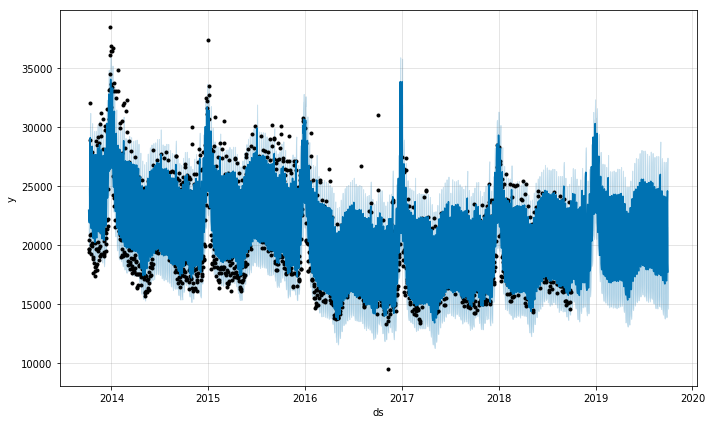

In [26]:
fig1 = m.plot(forecast)

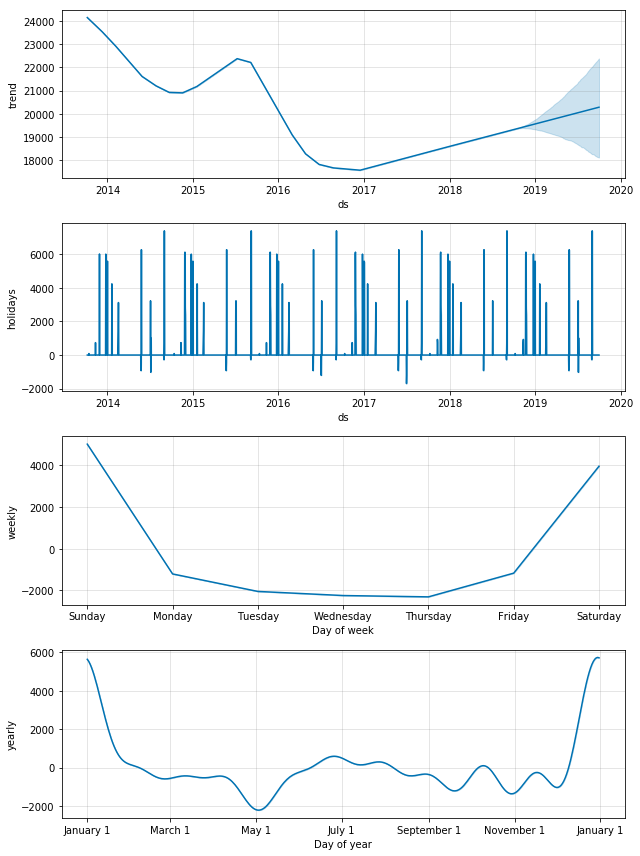

In [28]:
fig = m.plot_components(forecast)

In [29]:
forecast.to_csv('forecast.csv')

In [30]:
erroranalytics = m.predict(prophetdataframe)
erroranalytics['value'] = prophetdataframe['y']
erroranalytics['residuals'] = erroranalytics['value'] - erroranalytics['yhat']

#abs value of residuals 
erroranalytics['absoluteresiduals'] = abs(erroranalytics['residuals'])

total_error = erroranalytics['absoluteresiduals'].sum()

In [31]:
#on average by day this is how far my model is off
#model got better...it remains in model 
print(total_error/len(erroranalytics))

1158.1799799664338


In [36]:
print(erroranalytics.nlargest(10, 'absoluteresiduals'))

             ds         trend    yhat_lower    yhat_upper   trend_lower  \
1090 2016-10-01  17633.275067  19186.402002  23285.301796  17633.275067   
1175 2016-12-25  17596.480769  31987.861160  35910.879704  17596.480769   
1182 2017-01-01  17615.376185  31788.091590  36089.087900  17615.376185   
451  2015-01-01  21095.665124  28058.595327  32125.029862  21095.665124   
206  2014-05-01  21929.302718  15422.881173  19415.519258  21929.302718   
87   2014-01-02  23284.244353  24449.376520  28605.317656  23284.244353   
81   2013-12-27  23347.901066  25780.274065  29690.144957  23347.901066   
80   2013-12-26  23358.510519  24252.974280  28474.182022  23358.510519   
85   2013-12-31  23305.463257  24833.187804  28869.300021  23305.463257   
1708 2018-06-11  19021.284625  15881.932151  19972.518163  19021.284625   

       trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
1090  17633.275067       0.000000             0.000000             0.000000   
1175  17596.4807

In [33]:
date = pd.to_datetime("2016-10-01") #turn this into a dat 
theindex = prophetdataframe[prophetdataframe.ds == date].index

In [34]:
print(theindex)

Int64Index([1090], dtype='int64')


In [37]:
prophetdataframe = prophetdataframe.drop(theindex) #remove this row 
